# **SOLID WASTE DATA ASSESSMENT**

Regression Analysis

-Daniel Navarro
<br>

---

DATA DESCRIPTION: Data on solid waste was simulated from economic models and information was
compiled on a variety of variables affecting the amount of solid waste produced in a region. Measurements
on nine land-use variables are included in the data set for 40 regions in a nine-county area. A major goal in
the analysis of this data is to assess the predictive ability of the land-use variables (x1 − x9) on the amount
of solid waste (y) that is generated from the economic models. The data is given in a separate file. Variables
in the data set are described below:

<img src="Exam.png">

## **Problem 1:**
### (a) **Present a multiple regression model for y using all nine predictor variables (described above), describe the terms in the model, and state all of the model assumptions. At this stage of the problem, do not make transformations on any variables for this problem!**


In [126]:
# Load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import scipy as sp
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import statsmodels.formula.api as smf
# Import csv file and delete the last observation.
df = pd.read_excel(r'C:\Users\dnava\OneDrive\Documents\Regression Analysis\Test_DataSet.xlsx')

df.describe()
%matplotlib inline

In [4]:
df.corr()

,Obs,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
Obs,1.000000,-0.154853,0.189295,0.173653,0.127653,-0.197166,-0.171663,-0.145331,-0.245533,-0.160277,-0.363438
y,-0.154853,1.000000,0.185554,0.483217,0.642395,0.767578,0.822864,0.818237,0.785979,0.641617,-0.055053
x1,0.189295,0.185554,1.000000,0.393163,0.419575,0.137772,0.233448,0.061787,0.125908,0.144955,-0.041087
x2,0.173653,0.483217,0.393163,1.000000,0.888523,0.281951,0.198881,0.253193,0.252327,0.213226,-0.104227
x3,0.127653,0.642395,0.419575,0.888523,1.000000,0.464348,0.386748,0.425604,0.461990,0.348098,-0.121742
x4,-0.197166,0.767578,0.137772,0.281951,0.464348,1.000000,0.919851,0.911191,0.979056,0.910519,-0.008260
x5,-0.171663,0.822864,0.233448,0.198881,0.386748,0.919851,1.000000,0.907625,0.928650,0.893080,-0.033440
x6,-0.145331,0.818237,0.061787,0.253193,0.425604,0.911191,0.907625,1.000000,0.915448,0.793063,0.020601
x7,-0.245533,0.785979,0.125908,0.252327,0.461990,0.979056,0.928650,0.915448,1.000000,0.904299,0.044641
x8,-0.160277,0.641617,0.144955,0.213226,0.348098,0.910519,0.893080,0.793063,0.904299,1.000000,-0.038640


We can see some strong positive correlations between $X_3$ & $X_2$, and $X_4$, $X_8$, $X_7$, $X_6$ and $X_5$. <br> **Y** is strongly positively correlated with $X_3$, $X_4$, $X_8$, $X_7$, $X_6$ and $X_5$

In [5]:
# fit a full linear model
model_full = ols('y~x1+x2+x3+x4+x5+x6+x7+x8+x9', data = df).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     25.93
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           8.68e-12
Time:                        22:19:25   Log-Likelihood:                 27.898
No. Observations:                  40   AIC:                            -35.80
Df Residuals:                      30   BIC:                            -18.91
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1197      0.030      3.996      0.0

<br>In our full MLR model, the response variable y corresponds to solid waste while x1 - x9 are the predictor variables that we will use to estimate y.
<br>
From the full regression model we get the following statistics:
 - R-squared: 0.886
 - Adj. R-squared: 0.852
 - AIC: -35.80
 - BIC: -18.91
  <br>
From the measures for model selection we can see that $R^2$ could improve, maybe by modelling the MLR with a different combination of predictors or by fitting a different model (polynomial, splines, etc.).
 <br>
We need to fit different models and compare with the information criterias to determine which model is best (lower score indicates a better fit). It is important to pay attention to the note suggesting multicollinearity of the data.<br> 
 

<div class = 'alert alert-success'>
ASSUMPTIONS:
</div>


- response variable (y) has a linear relationship with at list one of the regressors (x1	x2	x3	x4	x5	x6	x7	x8	x9)
- Independence: residuals of the model are not correlated (observations are independent)
- Homoscedasticity: residuals have constant variance at every point in the linear model
- Normality: the residuals of the model are normally distributed for every variable
- No multicollinearity: none of the predictor variables are highly linearly correlated with each other

### (b) **Compute and present the prediction equation corresponding to the model described in part (a).**





$y^*$ = $\beta_0$ + $\beta_1$$Xindus$ + $\beta_2$$Xmetal$ + $\beta_3$$Xwhole$ + $\beta_4$$Xretail$ + $\beta_5$$Xrest$ + $\beta_6$$Xfinan$ + $\beta_7$$Xmisc$ + $\beta_8$$Xhome$ + $\beta_9$$Xother$ <br> 
<div class = 'alert alert-success'>
$y^*$ =  0.1197 - 4.928e-05$Xindus$ + 0.0002$Xmetal$ + 0.0001$Xwhole$ - 0.0004$Xretail$ + 0.0155$Xrest$ - 0.0004$Xfinan$ + 0.0008$Xmisc$ - 2.202e-05$Xhome$ - 0.0004$Xother$ 
</div>
$y^*$ = the predicted value of the dependent variable <br>
$\beta_0$ = the y-intercept (value of y when all other parameters are set to 0)<br>
$\beta_1X_1$ = the regression coefficient ($\beta_1$) of the first independent variable ($X_1$) (the effect that increasing the value of the independent variable has on the predicted y value)<br>
$\beta_nX_n$ = the regression coefficient of the last independent variable<br>
$\epsilon$ = model error (how much variation there is in our estimate of y) $E[\epsilon_i]=0$

In [6]:
# Computation of predicted y values
full_pred = model_full.predict()
print(full_pred)

[0.60370697 1.80088063 0.18953493 0.29673747 0.12744084 0.07974561
 0.67953776 0.69959719 0.5115618  0.10631271 0.2115734  0.35362924
 0.25022361 0.23428507 1.05178088 0.28296229 0.23245214 0.14465573
 0.17692315 0.17372935 0.25297987 0.12914346 0.17970461 0.15174003
 0.19984763 0.35611824 0.11288618 0.9832358  0.31275308 0.19663043
 0.20963531 0.23216899 0.43748487 0.40120436 0.83028494 0.29940556
 0.14260393 0.29228454 0.37840812 0.89980925]


Text(0, 0.5, 'Observed data')

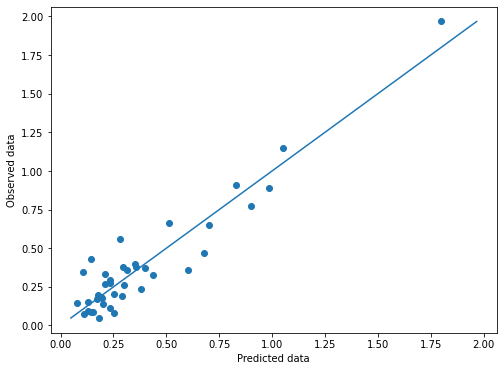

In [7]:
# Plot the prediction versus observed values
f, ax = plt.subplots(figsize=(8,6))
plt.scatter(full_pred,df['y'])
ident = (min(full_pred.min(),df['y'].min()),max(full_pred.max(),df['y'].max()))
ax.plot(ident,ident)
ax.set_xlabel('Predicted data')
ax.set_ylabel('Observed data')

We can see from the predicted vs. observed data that there is some variation present so a better fit will be seeked.

In [8]:
influence = model_full.get_influence()

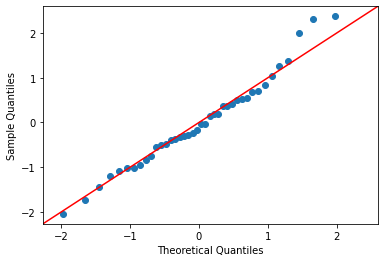

<Figure size 576x432 with 0 Axes>

In [9]:
# The Q-Q plot is not too bad, only towards the tail we might need some transformation but overall the residuals follow normalithy assumption
# Q-Q plot: helps determine if the residuals follow a normal distribution. Data should roughly follow a 45 degree angle.
residuals_full = model_full.resid
fig = sm.qqplot(residuals_full, fit = True, line= '45')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.show()

### (c) **Present and use R-Studentized residual plots for each x to determine what, if any, transformations are needed on any of the nine x variables. Also, using the appropriate residual plot, determine if any transformation is needed on y. Compare results from these plots to a Box-Cox analysis of the residuals.**

Normality assumption is not met at the end of the tail.

### R-Studentized residual plots for each x: checks non-constant variance and looks for non-linearity

These residual plots signify that we have not completely captured the predictive information of the data in our model, which is why it is seeping into our residuals.<br>
Predictors that need obvious transformations include: X9, X8, X7, X6 and X5 because they have nonlinear patterns. There also seems to be outliers in the data that I want to check. <br>
<div class = 'alert alert-success'>
- X5, X6, X7, X8: might need a $1/X_i$ transformation because they are partially linear <br>
- X9: might need a log transformation
</div>

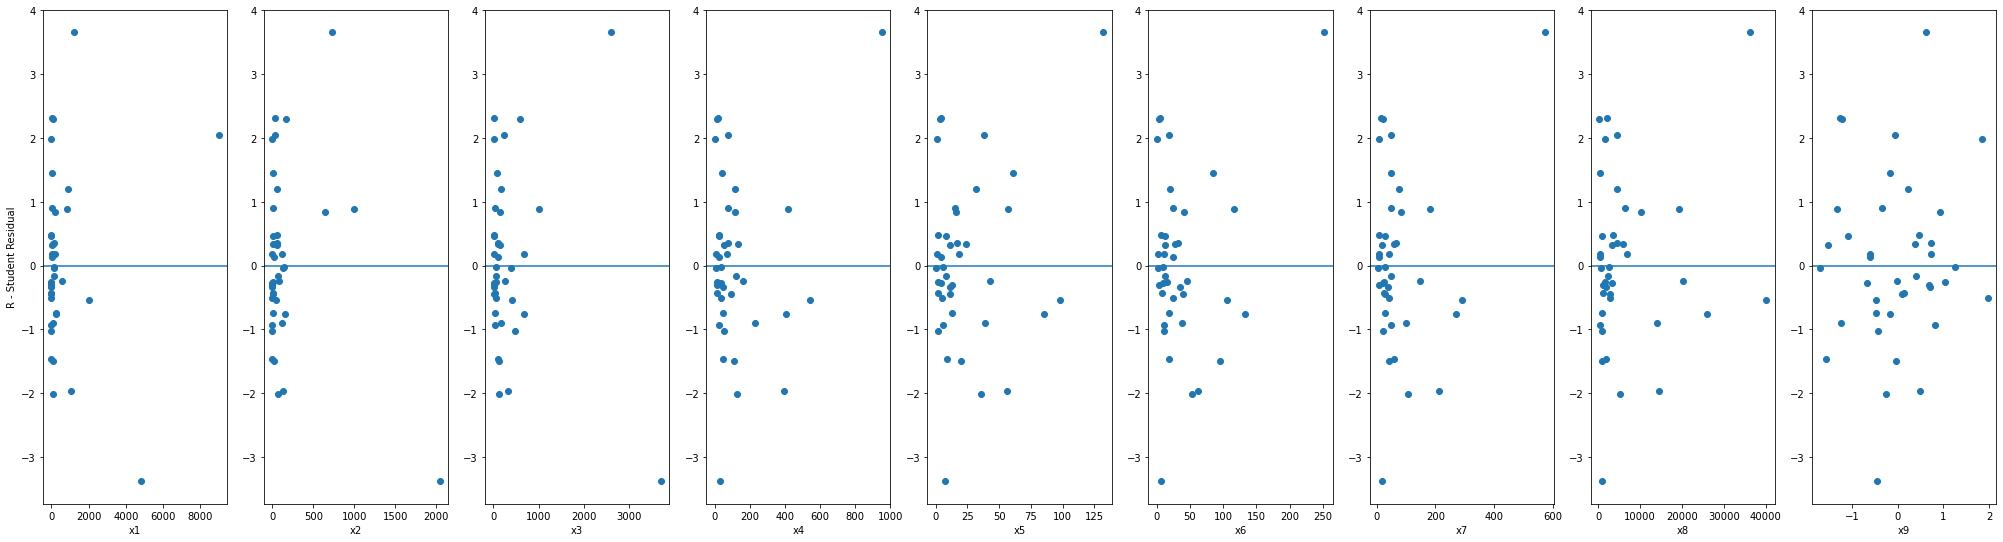

In [10]:
plt.subplots(figsize=(35,20))
plt.subplot(2, 9, 1) 
plt.scatter(df.x1,influence.resid_studentized_external)  
plt.xlabel('x1')
plt.ylabel('R - Student Residual')
plt.axhline(0)

plt.subplot(2, 9, 2) 
plt.scatter(df.x2,influence.resid_studentized_external)
plt.xlabel('x2')
plt.axhline(0)

plt.subplot(2, 9, 3) #
plt.scatter(df.x3,influence.resid_studentized_external)
plt.xlabel('x3')
plt.axhline(0)

plt.subplot(2, 9, 4) 
plt.scatter(df.x4,influence.resid_studentized_external)
plt.xlabel('x4')
plt.axhline(0)

plt.subplot(2, 9, 5) 
plt.scatter(df.x5,influence.resid_studentized_external)
plt.xlabel('x5')
plt.axhline(0)

plt.subplot(2, 9, 6) 
plt.scatter(df.x6,influence.resid_studentized_external)
plt.xlabel('x6')
plt.axhline(0)

plt.subplot(2, 9, 7) #
plt.scatter(df.x7,influence.resid_studentized_external)
plt.xlabel('x7')
plt.axhline(0)

plt.subplot(2, 9, 8) 
plt.scatter(df.x8,influence.resid_studentized_external)
plt.xlabel('x8')
plt.axhline(0)

plt.subplot(2, 9, 9) 
plt.scatter(df.x9,influence.resid_studentized_external)
plt.xlabel('x9')
plt.axhline(0)

plt.show()

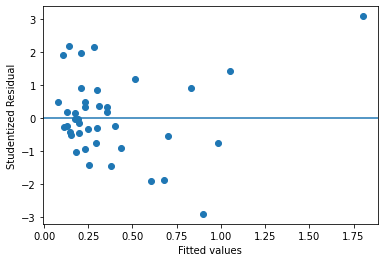

In [11]:
plt.scatter(model_full.fittedvalues,influence.resid_studentized)
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residual')
plt.axhline(0)

<div class = 'alert alert-success'>
Log transformation on y is needed.
<br>
<br>

From the Studentized Residuals vs. Fitted Values plot we can see that the residuals are concentrated more to the left side of the plot with some leverage points at -3 and 3. We need to check if this points are influential points. A log transformation is recommended for the fitted values of y to make the variance more spread out. We see that the variance is not constant, the data seems to have a curvature and is not linear. </div>

### **Box_Cox ANALYSIS**: Transforms any non-linear distribution to normal
Displays:  
 - The minimum value
 - The first quartile (the 25th percentile)
- The median value
- The third quartile (the 75th percentile)
- The maximum value

C:\Users\dnava\AppData\Local\Temp\ipykernel_2216\1047983139.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.y, hist = False, kde = True,
C:\Users\dnava\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2517: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\dnava\AppData\Local\Temp\ipykernel_2216\1047983139.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ada


Lambda value used for Transformation: -0.04781688786777463


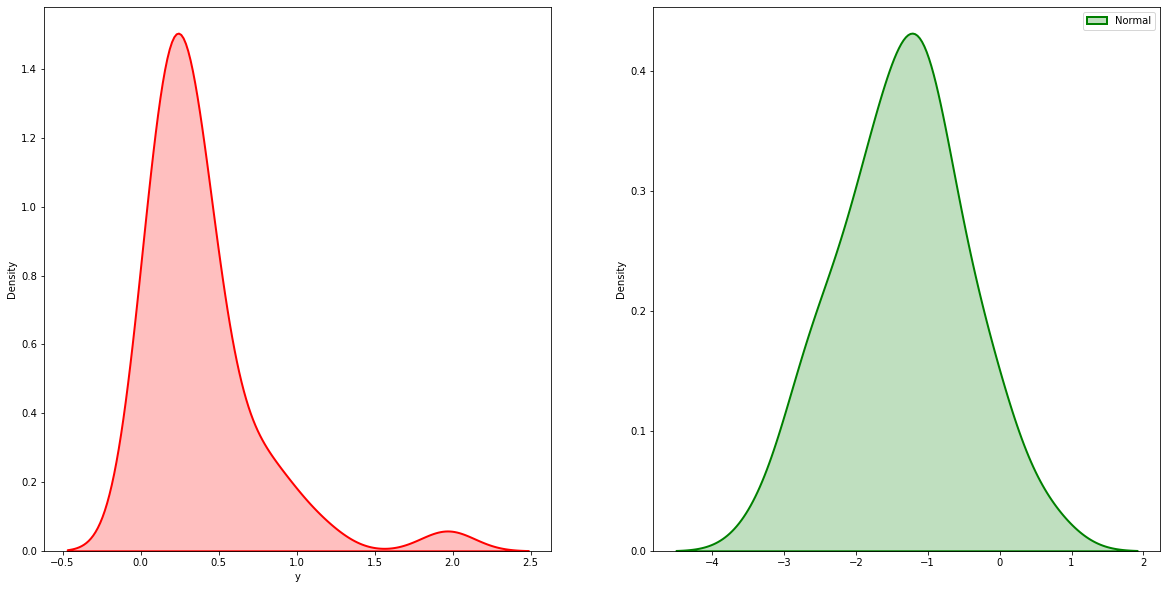

In [13]:
# Box_Cox ANALYSIS
from patsy import dmatrix
X = dmatrix('x1+x2+x3+x4+x5+x6+x7+x8+x9', data = df) 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(df.y)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(df.y, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(10)
fig.set_figwidth(20)
 
print('')
print(f"Lambda value used for Transformation: {fitted_lambda}")


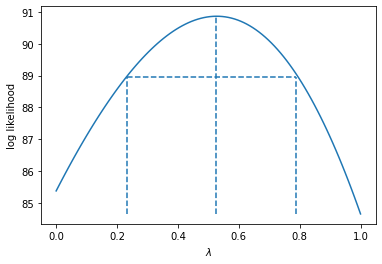

In [468]:
#Box-Cox
X = dmatrix('x1+x2+x3+x4+x5+x6+x7+x8+x9', data = df)

n = df.shape[0]
sumlogy = np.sum(np.log(df.y))
lam = np.linspace(-0.0,1,100)
llk = np.empty(100)
for i in range(0,100):
  lmod = sm.OLS(sp.stats.boxcox(df.y,lam[i]),X).fit()
  llk[i] = -(n/2)*np.log(lmod.ssr/n) + (lam[i] - 1)*sumlogy
fig, ax = plt.subplots()
ax.plot(lam,llk)
ax.set_xlabel('$\lambda$')
ax.set_ylabel('log likelihood')
maxi = llk.argmax()
ax.vlines(lam[maxi],ymin = min(llk),ymax = max(llk), linestyle = 'dashed')
cicut = max(llk) - sp.stats.chi2.ppf(0.95,1)/2
rlam = lam[llk > cicut]
ax.hlines(cicut, xmin =rlam[0],xmax = rlam[-1], linestyle = 'dashed')
ax.vlines([rlam[0],rlam[-1]], ymin=min(llk), ymax = cicut, linestyle = 'dashed')

<div class = 'alert alert-warning'>
Box-cox does not guarantee normality because it never checks for the normality which is necessary to be foolproof that it has correctly transformed the non-normal distribution or not. It only checks for the smallest Standard deviation.
<br>
Therefore, it is necessary to always check the transformed data for normality using a probability or Q-Q plot. </div>

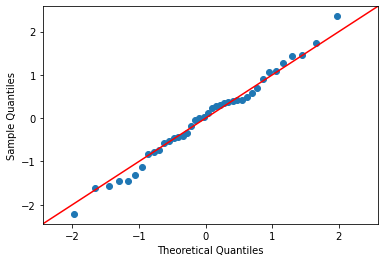

<Figure size 576x432 with 0 Axes>

In [636]:
fig = sm.qqplot(fitted_data, fit = True, line= '45')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.show()

Here we can see the Box-Cox transformation gives a better Q-Q plot than without the transformation.

### (d)  State your conclusions from your analysis in part 1(c) and what, if any, action you would recommend on transforming any of these variables. If you find a needed transformation, state it, but do not use it in any further questions unless it is specifically requested.

<div class = 'alert alert-success'>
CONCLUSIONS: 
<br>The model with the Box-Cox transformation applied to the data seems to be better than the untransformed MLR because it transforms the data to normal. This residuals follow the normality assumption better when transfromed through Box-Cox transformation.
<br>
Needed transformations: y (log) and x9 (sqrt)
</div>


---

## **Problem 2:**
(a) Construct an ANOVA table for the regression of the untransformed y on the original 9 predictor
variables. Use the results from the ANOVA table to make an initial assessment of the fit. Discuss
why the fit is (or is not) adequate.

In [17]:
# Print ANOVA table
print('Full Model ANOVA')
anova_full = sm.stats.anova_lm(model_full, typ=3)
print(anova_full)

Full Model ANOVA
             sum_sq    df          F    PR(>F)
Intercept  0.308951   1.0  15.966923  0.000386
x1         0.135985   1.0   7.027866  0.012691
x2         0.038630   1.0   1.996456  0.167959
x3         0.035920   1.0   1.856391  0.183184
x4         0.005889   1.0   0.304345  0.585257
x5         0.503982   1.0  26.046339  0.000017
x6         0.001160   1.0   0.059936  0.808265
x7         0.006861   1.0   0.354574  0.556001
x8         0.175357   1.0   9.062643  0.005250
x9         0.000004   1.0   0.000209  0.988558
Residual   0.580483  30.0        NaN       NaN


<div class = 'alert alert-success'>
    
The Anova tests to compare the means of different levels. Here our predictors are seen as the different levels and we can test to see their which means are significant according to their p-values. <br>
Based on the ANOVA table, at an $\alpha=0.05$, $X_1$, $X_5$ and $X_8$ are statistically significant.
<br> <br>
The fit is not adequate because we have too many variables that are not significant according to the ANOVA model. <br>   
 
    There might be some interaction effects that are not represented by the main effects, as well as multicollinearity that we need to check.

</div>

(b) Construct a second ANOVA table for the fit of the original data set using only x1, x2, and x5.
Do the ANOVA tables for this fit and the previous one in part 2(a) clearly indicate that one of
the two sets of variables is preferable to the other? Why (or why not)?

In [638]:
model_x125 = ols('y~x1+x2+x5',data=df).fit()

anova_x125 = sm.stats.anova_lm(model_x125,typ=3)
print(anova_x125)


             sum_sq    df           F        PR(>F)
Intercept  0.348146   1.0   12.394885  1.188426e-03
x1         0.092312   1.0    3.286528  7.819608e-02
x2         0.633849   1.0   22.566625  3.212961e-05
x5         2.894261   1.0  103.043076  4.156091e-12
Residual   1.011163  36.0         NaN           NaN


<div class = 'alert alert-success'>
    No, the reduced ANOVA test indicates that the variables tested are significant. In this case, for an $\alpha=0.05$, X2 and X5 are significant. Even though the variables resulted more significant than before, the ANOVA tells us nothing about the variables not in the model or their interactions as we would need to model these as well. ANOVA helps us find out whether the differences between groups of data are statistically significant. We can understand how each independent variable’s mean is different from the others, so we can begin to understand which of them has a connection to the dependent variable and allows us to learn what is driving that behavior.
    We need to try different variations and more models to determine which is better based on lower information criterias, larger $r^2$ and lower MSE.

(c) Perform (separately) a statistical check on the assumptions of constant variance and normality
for the original 9-variable model in part 2(a) and state your conclusions and the procedures you
used.

**From the histograms of each predictor, we can see that some transformation is needed to assume normality.**

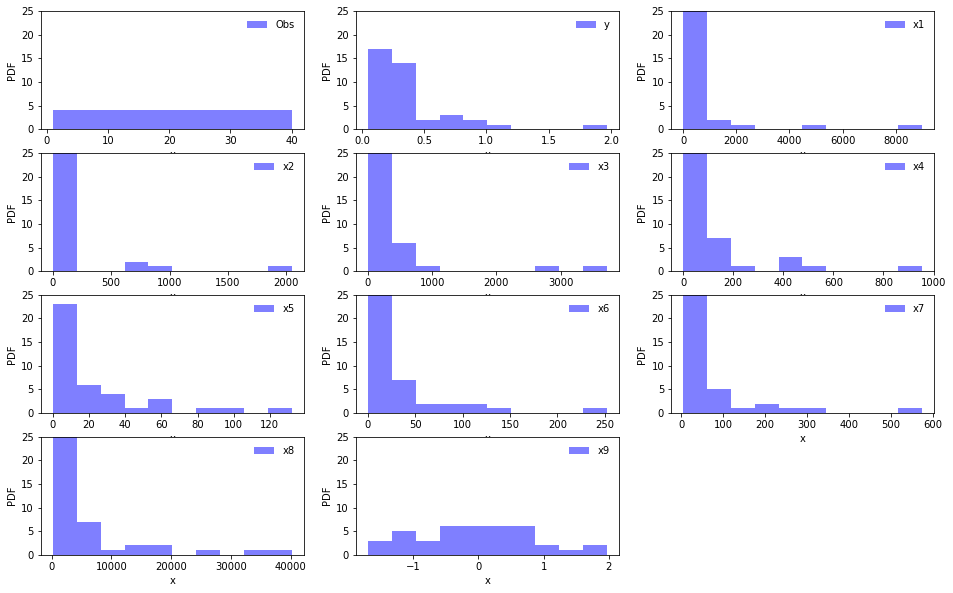

In [23]:
# Histograms to see the distribution of the data....some transformation is needed for some variables to resolve skewness.
# Generically define how many plots along and across
ncols = 3
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(df.columns):

            ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(df.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('PDF')
            ax.set_ylim([0, 25])
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

### The Q-Q plot helps determine if the residuals follow a normal distribution. Data should roughly follow a 45 degree angle.

<div class = 'alert alert-success'>
The Q-Q plot is not too bad since only towards the tail fo the plot we see that the data is not so normal. Maybe a transformation would be helpful, but overall the residuals follow normalithy assumption. </div?

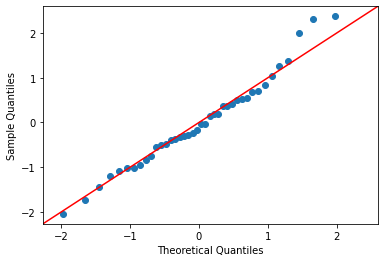

<Figure size 576x432 with 0 Axes>

In [24]:
# Q-Q plot: helps determine if the residuals follow a normal distribution. Data should roughly follow a 45 degree angle.
residuals_full = model_full.resid
fig = sm.qqplot(residuals_full, fit = True, line= '45')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.show()

### Fitted Values vs. Residuals Plot: determine if the residuals of a regression model have constant variance, checks for nonlinearity and potential outliers.

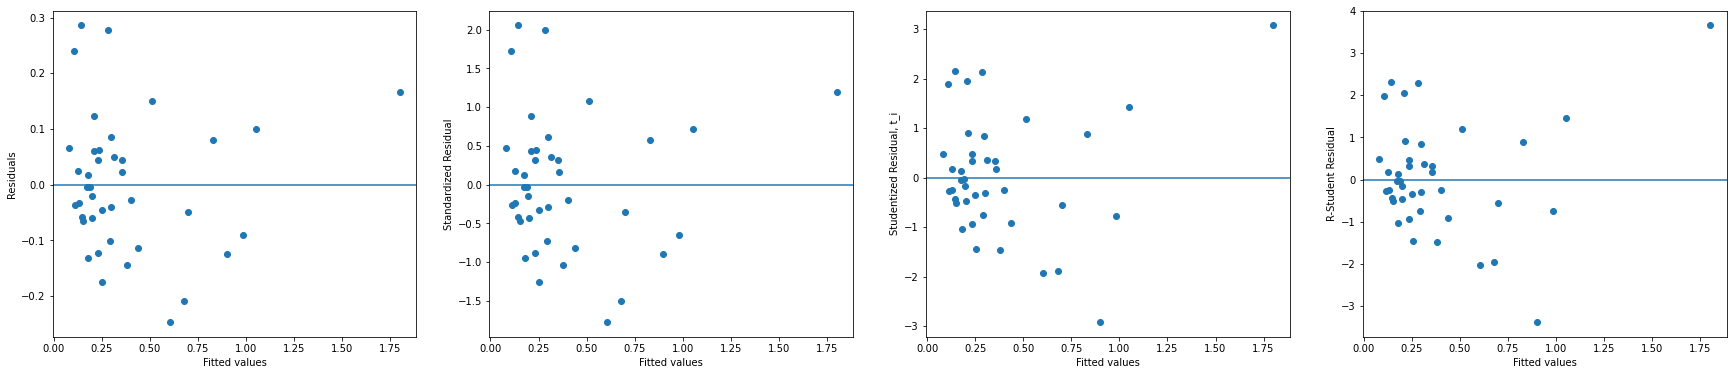

In [25]:
f, ax = plt.subplots(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.scatter(model_full.fittedvalues,residuals_full)
plt.axhline(0)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Standardized Residuals
standard_residual = influence.resid/np.sqrt(model_full.mse_resid)
plt.subplot(1, 4, 2) 
plt.scatter(model_full.fittedvalues,standard_residual)
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residual')
# plt.title("")
plt.axhline(0)

# Studentized Residuals
plt.subplot(1, 4, 3) 
plt.scatter(model_full.fittedvalues,influence.resid_studentized)
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residual, t_i')
# plt.title("")
plt.axhline(0)

# R-Studentized Residuals external
plt.subplot(1, 4, 4) 
plt.scatter(model_full.fittedvalues,influence.resid_studentized_external)
plt.xlabel('Fitted values')
plt.ylabel('R-Student Residual')
#plt.title("")
plt.axhline(0)

plt.show()

<div class = 'alert alert-success'>
    By plotting the fitted values vs. the multiple residuals we see that the data has a more less non-constant variance (inverted-cone shape) with some outliers, and is not linear as we can see some curvature in the residuals. 
    
</div>

### Partial Regressions Plots: determine if the correct relationship between y and $x_i$ has been identified and the marginal contribution of a variable, given all other variables are in the model


- X2 - X5, X8: seem to need $(X_i)^2$ or $1/X_i$ transformation because the plot is curvilinear
- X7 and X9: might need a log transformation

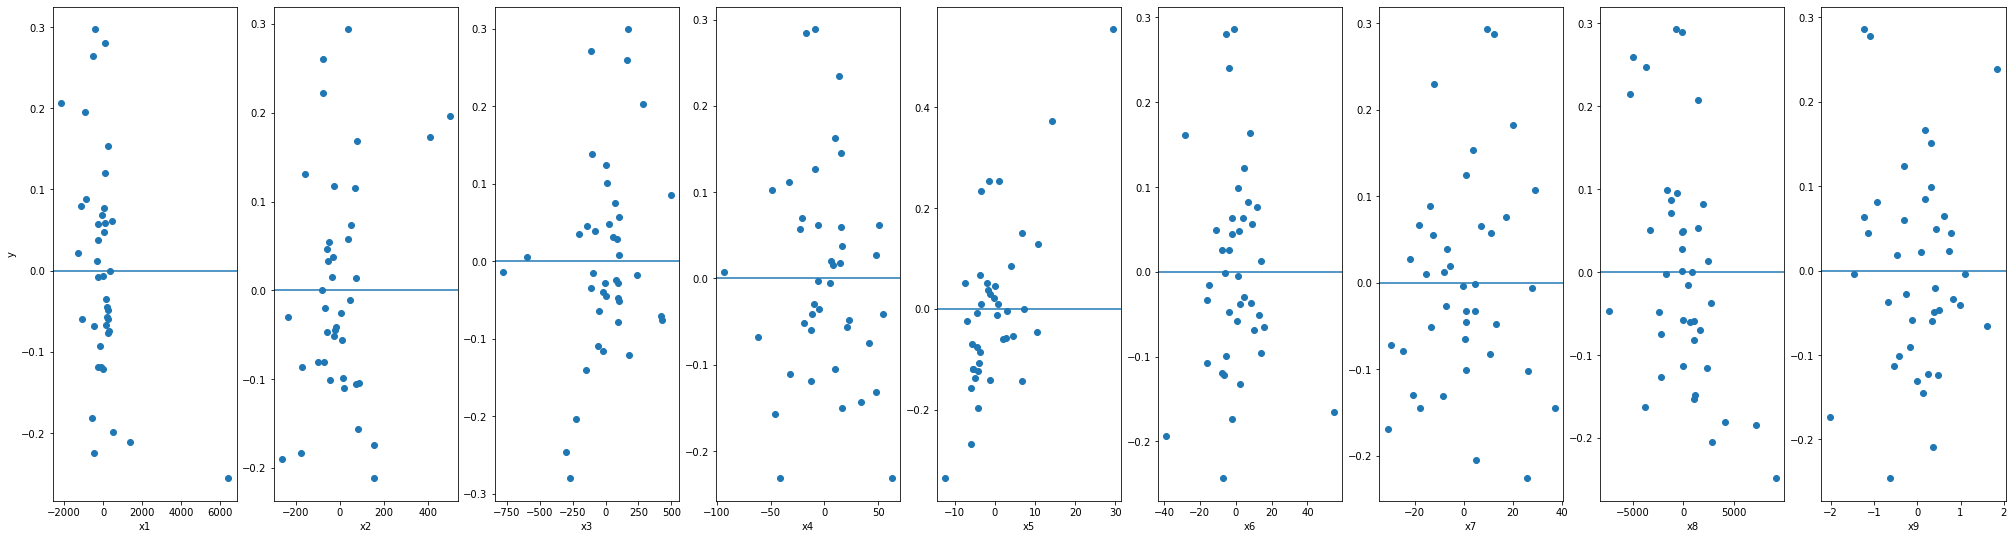

In [26]:
# Partial Regressions
lmod_y_1 = smf.ols('y ~ x2+x3+x4+x5+x6+x7+x8+x9', data = df).fit()
lmod_x_1 = smf.ols('x1 ~ x2+x3+x4+x5+x6+x7+x8+x9', data = df).fit()

lmod_y_2 = smf.ols('y ~ x1+x3+x4+x5+x6+x7+x8+x9', data = df).fit()
lmod_x_2 = smf.ols('x2 ~ x1+x3+x4+x5+x6+x7+x8+x9', data = df).fit()

lmod_y_3 = smf.ols('y ~ x1+x2+x4+x5+x6+x7+x8+x9', data = df).fit()
lmod_x_3 = smf.ols('x3 ~ x1+x2+x4+x5+x6+x7+x8+x9', data = df).fit()

lmod_y_4 = smf.ols('y ~ x1+x2+x3+x5+x6+x7+x8+x9', data = df).fit()
lmod_x_4 = smf.ols('x4 ~ x1+x2+x3+x5+x6+x7+x8+x9', data = df).fit()

lmod_y_5 = smf.ols('y ~ x1+x2+x3+x4+x6+x7+x8+x9', data = df).fit()
lmod_x_5 = smf.ols('x5 ~ x1+x2+x3+x4+x6+x7+x8+x9', data = df).fit()

lmod_y_6 = smf.ols('y ~ x1+x2+x3+x4+x5+x7+x8+x9', data = df).fit()
lmod_x_6 = smf.ols('x6 ~ x1+x2+x3+x4+x5+x7+x8+x9', data = df).fit()

lmod_y_7 = smf.ols('y ~ x1+x2+x3+x4+x5+x6+x8+x9', data = df).fit()
lmod_x_7 = smf.ols('x7 ~ x1+x2+x3+x4+x5+x6+x8+x9', data = df).fit()

lmod_y_8 = smf.ols('y ~ x1+x2+x3+x4+x5+x6+x7+x9', data = df).fit()
lmod_x_8 = smf.ols('x8 ~ x1+x2+x3+x4+x5+x6+x7+x9', data = df).fit()

lmod_y_9 = smf.ols('y ~ x1+x2+x3+x4+x5+x6+x7+x8', data = df).fit()
lmod_x_9 = smf.ols('x9 ~ x1+x2+x3+x4+x5+x6+x7+x8', data = df).fit()


plt.subplots(figsize=(35,20))
# Partial Residual Plots
plt.subplot(2, 9, 1) 
plt.scatter(lmod_x_1.resid,lmod_y_1.resid)  
plt.xlabel('x1')
plt.ylabel('y')
plt.axhline(0)

plt.subplot(2, 9, 2) 
plt.scatter(lmod_x_2.resid,lmod_y_2.resid)
plt.xlabel('x2')
plt.axhline(0)

plt.subplot(2, 9, 3) #
plt.scatter(lmod_x_3.resid,lmod_y_3.resid)
plt.xlabel('x3')
plt.axhline(0)

plt.subplot(2, 9, 4) 
plt.scatter(lmod_x_4.resid,lmod_y_4.resid)
plt.xlabel('x4')
plt.axhline(0)

plt.subplot(2, 9, 5) 
plt.scatter(lmod_x_5.resid,lmod_y_5.resid)
plt.xlabel('x5')
plt.axhline(0)

plt.subplot(2, 9, 6) 
plt.scatter(lmod_x_6.resid,lmod_y_6.resid)
plt.xlabel('x6')
plt.axhline(0)

plt.subplot(2, 9, 7) #
plt.scatter(lmod_x_7.resid,lmod_y_7.resid)
plt.xlabel('x7')
plt.axhline(0)

plt.subplot(2, 9, 8) 
plt.scatter(lmod_x_8.resid,lmod_y_8.resid)
plt.xlabel('x8')
plt.axhline(0)

plt.subplot(2, 9, 9) 
plt.scatter(lmod_x_9.resid,lmod_y_9.resid)
plt.xlabel('x9')
plt.axhline(0)

plt.show()

(d) Determine which regression coefficients in the original 9-variable model in part 2(a) are significant
at the 0.05 significance level.

<div class = 'alert alert-success'>Statistically significant predictors according to full model at $\alpha = 0.05$:
    <br> x1, x5, x8 </div>

 

---

## **Problem 3:**
(a) Identify any outliers and any influential points in the data set using the appropriate statistics based
on a fit to the untransformed y using the original 9-variable model. These include computing
statistics such as leverage values, studentized residuals, studentized deleted residuals, Cook’s
distance measure, DFBETAs, DFFITS, and COVRATIOs (using the cutpoints identified in class).
State your conclusions and justify your answers using the results of the analysis.

In [252]:
# Use R-Student statistics to test outlier
stud = pd.DataFrame({'Rstud':influence.resid_studentized_external, 'ID':df.index})
alpha = 0.05
t_cutoff = abs(sp.stats.t.ppf(alpha/2,29))
# Use Bonferroni cutoff to find outliers with R-Student statistics
Bonferroni_cutoff = abs(sp.stats.t.ppf(0.05/(2*40),29))
stud[abs(stud.Rstud) > Bonferroni_cutoff]

,Rstud,ID
1,3.659485,1


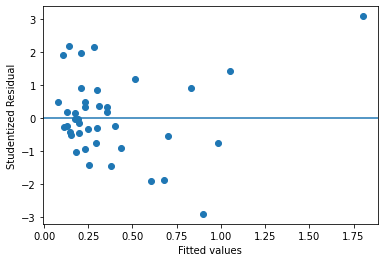

In [27]:
plt.scatter(model_full.fittedvalues,influence.resid_studentized)
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residual')
plt.axhline(0)

The residuals plot displays a pattern indicating that there are non linear associations in the data, hence the estimates for the model coefficients aren’t reliable.
From the Studentized Residuals plot, we don't see any clear outlier since no value is greater than 3 ($t_i$ > 3), but we know there is at least one outlier expressed by Bonferroni's cutoff. <br> 

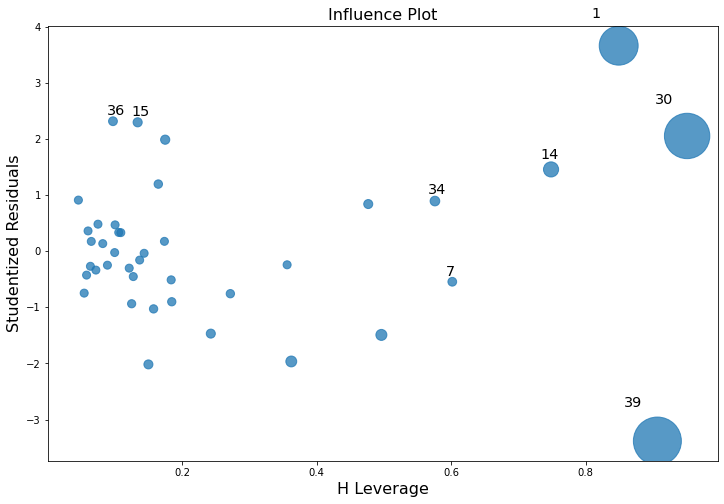

In [28]:
# Scale Location Plot
## Use a different model command
X = model_full.model.wexog # get the design matrix
lmod_1 = sm.OLS(df['y'], sm.add_constant(X)).fit()

## Plot the leverage vs residuals graph
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lmod_1, alpha  = 0.05, ax = ax, criterion="cooks")

<div class = 'alert alert-warning'>
   From the plot above, observations with high leverage, or large residuals are labeled to show potential influence points. We can see that there are several outliers (potential influence points) which include: 1,7,14,15,30,34,36,39. <br> 
</div>

Cutoffs for measures of influence:
- Cook's D: Large values of D_i indicate an influential point, usually if  $$D_i > 1$$
- DFBETAS: $$|DFBETASj,i| > 2 / sqrt(n)$$
- DFFITS: $$|DFFITSj,i| > 2 [p / sqrt(n)]$$
- COVRATIO: $$|COVRATIO - 1| > 3 / p$$

In [29]:
# DFBETAS
dfbetas = pd.DataFrame(influence.dfbetas)
dfbetas.columns = ['dfbeta-x1','dfbeta-x2', 'dfbeta-x3','dfbeta-x4', 'dfbeta-x5', 'dfbeta-x6','dfbeta-x7','dfbeta-x8','dfbeta-x9','dfbeta-y']
cutoff = 2/np.sqrt(df.shape[0])
dfbetas[dfbetas.apply(lambda x: (abs(x['dfbeta-x1']) > cutoff) |  \
    (abs(x['dfbeta-x2']) > cutoff) | (abs(x['dfbeta-x3']) > cutoff) | (abs(x['dfbeta-x4']) > cutoff) | (abs(x['dfbeta-x5']) > cutoff) | \
                      (abs(x['dfbeta-x6']) > cutoff) | (abs(x['dfbeta-x7']) > cutoff) | (abs(x['dfbeta-x8']) > cutoff) | (abs(x['dfbeta-x9']) > cutoff) | (abs(x['dfbeta-y']) > cutoff), axis = 1)]

,dfbeta-x1,dfbeta-x2,dfbeta-x3,dfbeta-x4,dfbeta-x5,dfbeta-x6,dfbeta-x7,dfbeta-x8,dfbeta-x9,dfbeta-y
0,-0.085049,0.131622,-0.384440,0.392939,0.433401,-0.315323,0.171063,-0.538067,0.435202,0.267273
1,-1.821629,0.319661,-1.692991,1.810046,0.463091,-1.531229,0.849690,1.806811,-1.829258,0.332745
3,0.013476,0.073165,0.656683,-0.605279,-0.272527,-0.177494,0.089860,0.321274,0.086868,0.039813
6,-0.313141,0.179171,-0.433822,0.500047,-0.745960,-0.561087,1.067273,-0.119667,0.951351,-0.177584
7,0.062836,-0.021576,0.168144,-0.137866,-0.088193,-0.054183,0.036439,0.244934,-0.413111,-0.065293
8,0.175725,-0.159791,0.116826,-0.087698,0.096732,0.407941,-0.418056,0.044708,-0.340527,0.083628
9,0.478906,-0.146245,-0.186947,0.235705,0.143808,0.041320,-0.087695,-0.250361,0.167286,0.785376
14,-0.213933,-0.835951,0.223355,0.014926,-0.464254,1.860110,0.047679,-0.381277,-0.796960,0.177569
15,0.453530,-0.131030,-0.219226,0.277616,-0.208406,-0.082608,-0.150507,0.284075,-0.088931,-0.523008
20,-0.227606,-0.113218,-0.155628,0.256152,0.374244,0.222421,0.036406,-0.596818,0.193265,0.663220


In [254]:
# DFFITS
cutoff = 2*np.sqrt(9/df.shape[0])
dffits = pd.DataFrame({'dffits':influence.dffits[0]})
dffits[abs(dffits.values) > cutoff]

,dffits
1,8.676337
6,-1.480806
14,2.511106
30,9.004682
34,1.039921
38,-1.480473
39,-10.525487


In [31]:
#COVRATIO 
Covratio = pd.DataFrame({'covratio': influence.cov_ratio})
Covratio[abs(Covratio.values - 1) > 3*(df.shape[1]+1)/df.shape[0]]

,covratio
3,2.110316
7,3.182701
14,2.756175
30,7.331780
33,2.136587
34,2.524155


In [32]:
Covratio[Covratio.values < 1]

,covratio
0,0.444636
1,0.208608
6,0.631517
9,0.475615
15,0.305526
20,0.905065
36,0.285547
39,0.540625


In [33]:
# Here we can see all the measures of influence learned in class.
Influential = pd.DataFrame({'Hat': influence.hat_matrix_diag, 'CooksD': influence.cooks_distance[0], \
                            'DFFITS': influence.dffits[0], 'DFbeta-Int': influence.dfbetas[:,0],    \
                            'DFbetaCase': influence.dfbetas[:,1], 'DFbeta-Dist': influence.dfbetas[:,-1], \
                            'CovRatio': influence.cov_ratio})
round(Influential,4)

,Hat,CooksD,DFFITS,DFbeta-Int,DFbetaCase,DFbeta-Dist,CovRatio
0,0.1501,0.0652,-0.8476,-0.0850,0.1316,0.2673,0.4446
1,0.8490,5.3274,8.6763,-1.8216,0.3197,0.3327,0.2086
2,0.1000,0.0000,-0.0083,-0.0046,0.0011,-0.0057,1.5592
3,0.4768,0.0648,0.8012,0.0135,0.0732,0.0398,2.1103
4,0.0653,0.0002,0.0459,0.0392,-0.0066,0.0257,1.4860
5,0.0752,0.0019,0.1371,0.1006,-0.0048,0.0603,1.4019
6,0.3624,0.2002,-1.4808,-0.3131,0.1792,-0.1776,0.6315
7,0.6017,0.0459,-0.6696,0.0628,-0.0216,-0.0653,3.1827
8,0.1648,0.0278,0.5309,0.1757,-0.1598,0.0836,1.0392
9,0.1751,0.0762,0.9147,0.4789,-0.1462,0.7854,0.4756


<div class = 'alert alert-success'>
    Based on the measures of influence, I conclude that observation 1 is an outlier, and 30 and 39 are influential points.
</div>

(b) Do you think your conclusions in part 3(a) are connected to the results found in Problem 1?
Explain.

<div class = 'alert alert-success'>
    Yes, the outliers and influential points cause our model to yield inaccurate results.
    
    
    
From the studentized residuals vs. fitted plot, we assumed that there was no clear outlier, but clearly there is at least one outlier, by Bonferroni's cutoff, and several influential points were evident after performing the measures of influence tests.
<br>From problem 1 we saw that the predictors all seemed to show outliers in the R-student residuals plot vs. regressors plot. I recommended transforming some of the variables so that the residuals could meet the normality assumption. We also saw that the variance was not constant for all of the predictors and that some of the predictors are not linear which could be due to outliers as well.
</div>

---

## **Problem 4:**
Perform a multicollinearity diagnosis using the original 9-variable regression model with the untransformed y. Identify any severe multicollinearities using the variance inflation factors as well as the
appropriate measures based on the eigenvalues and eigenvectors of X′X (using the cutpoints identified
in the notes). Be sure to indicate the nature and strength of the identified multicollinearities.

#### VIF before centering and scaling.

In [34]:
# Calculate VIF
from patsy import dmatrix
X = dmatrix('x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9' , df, return_type = 'dataframe')

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.Series(VIF,X.columns)

#If the VIF SCORE is greater than 5 than there is multicolinearity.

Intercept     1.855143
x1            1.783863
x2            6.952037
x3            8.801241
x4           31.271479
x5           15.945293
x6           11.407874
x7           39.592409
x8            9.751667
x9            1.214792
dtype: float64

<div class = 'alert alert-success'>
Variables showing severe multicollinearity based on VIF > 5: x2, x3, x4, x5, x6, x7, x8
</div>

#### Eigenvalues & Eigenvectors of X'X

If we scale and center the regressors in the X′X matrix, we have the correlation matrix.
<br>
**If $|rij|$ is close to unity, then there may be an indication of multicollinearity.**

In [639]:
# Scale and center the data and make (X'X) as correlation matrix

df_scale = (df - df.mean())/df.std()

In [640]:
lm_scaled = smf.ols('y~x1+x2+x3+x4+x5+x6+x7+x8+x9', df_scale).fit()
print(lm_scaled.summary())
print(sm.stats.anova_lm(lm_scaled))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     25.93
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           8.68e-12
Time:                        20:30:38   Log-Likelihood:                -12.807
No. Observations:                  40   AIC:                             45.61
Df Residuals:                      30   BIC:                             62.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.551e-17      0.061  -9.12e-16      1.0

<br>
As we can see from the regression of the scaled and centered data, there is not much difference when compared to the regression model of the data that was not scaled.<br>

**The centering and scaling of the data does however reduce the multicollinearity and the individual estimator’s standard deviation.**
<br>

#### VIF of scaled and centered data

In [37]:
# Calculate VIF

X_c = dmatrix('x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9', df_scale, return_type='dataframe')

VIF_c = [variance_inflation_factor(X_c.values,i) for i in range(X_c.shape[1])]
pd.Series(VIF_c,X_c.columns)

#If the VIF SCORE is greater than 5 than there is multicolinearity.

Intercept     1.000000
x1            1.783863
x2            6.952037
x3            8.801241
x4           31.271479
x5           15.945293
x6           11.407874
x7           39.592409
x8            9.751667
x9            1.214792
dtype: float64

<div class = 'alert alert-success'>
Variables showing severe multicollinearity based on VIF > 5: x2, x3, x4, x5, x6, x7, x8
</div>

Small eigenvalues are indications of multicollinearity, and a large condition number indicates multicollinearity exists (but tells us nothing about how many regressors are involved).
<br>
The condition number of X′X is: <br>
$κ$ = $λ_max$ / $λ_min$ <br>

This number measures the spread in the eigenvalues:
- If κ < 100, no serious problem
- If 100 < κ < 1000, moderate to strong multicollinearity
- If κ > 1000, strong multicollinearity

The condition indices of X′X are: <br>

$κ_j$ = $λ_max$ / $λ_j$, for j = 1, . . . , p <br>

The number of condition indices that are large **(>1000)**
provide a measure of the number of near linear dependencies in X′X


In [644]:
# Find kappa using eigenvalues
X = lm_scaled.model.wexog[:,1:]
XTX = X.T @ X
print(XTX)
evals, evecs = np.linalg.eig(XTX)
eigmax = np.max(evals)
print('----------------------------------------------------------------------------')
print('kappa = ',eigmax/np.min(evals))
print('----------------------------------------------------------------------------')
print(eigmax/evals)

[[39.         15.33336398 16.36343509  5.37309001  9.1044661   2.40970388
   4.91041283  5.65325835 -1.60239553]
 [15.33336398 39.         34.65241158 10.99608016  7.75635753  9.87451444
   9.84073743  8.31582656 -4.06485588]
 [16.36343509 34.65241158 39.         18.10957535 15.08317944 16.59854148
  18.01762826 13.57582538 -4.74794854]
 [ 5.37309001 10.99608016 18.10957535 39.         35.8742045  35.53646165
  38.18318757 35.51024734 -0.3221334 ]
 [ 9.1044661   7.75635753 15.08317944 35.8742045  39.         35.39738595
  36.21733688 34.83013411 -1.30415042]
 [ 2.40970388  9.87451444 16.59854148 35.53646165 35.39738595 39.
  35.70245858 30.92944379  0.80343314]
 [ 4.91041283  9.84073743 18.01762826 38.18318757 36.21733688 35.70245858
  39.         35.2676789   1.74098857]
 [ 5.65325835  8.31582656 13.57582538 35.51024734 34.83013411 30.92944379
  35.2676789  39.         -1.50697287]
 [-1.60239553 -4.06485588 -4.74794854 -0.3221334  -1.30415042  0.80343314
   1.74098857 -1.50697287 39. 

<div class = 'alert alert-success'>
Kappa comes out to be 323.2101, which is less than 1000 but greater than 100, indicating that there is moderate to strong multicollinearity in the dataset. 
</div>

<div class = 'alert alert-warning'>
The nature and strength of the identified multicollinearities come from constraints that come from the assumptions of a MLR model (normality, independence, homoscedasticity, linear relationship of response varible with at least one predictor).
The data could also have physical constraints present that are independent of the data collection method. We could also have an overdefined model which in this case we should redefine the model using smaller set of regressors, do preliminary studies using subsets of regressors, or use principal components type regressor methods to remove regressors.
<br>
The strength of the multicollinearity according to kappa is 323.2101 which is indicative of a moderate to strong correlation.
<br> 
To deal with multicollinearity one should:
<br>
1. Collect more data <br>
2. Re-specify the model <br>
3. Ridge Regression

</div>

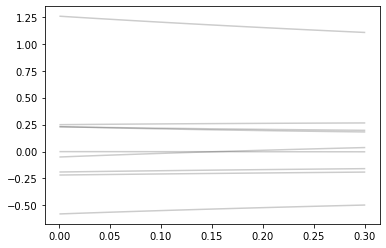

In [454]:
# Try different values of k to get estimates of ridge trace for ridge regression
from sklearn import linear_model
df_X = df_scale.drop(['Obs','y'], axis = 1)
n_k = 50
ks = np.linspace(0.001,0.3,n_k)
coefs = []
for k in ks:
    ridge = linear_model.Ridge(alpha = k)
    ridge.fit(df_X, df_scale.y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(ks,coefs,'k',alpha = 0.2)


To obtain the ridge solution for the data, we must get the
regression estimations for several values 0 ≤ k ≤ 1, with X′X in
correlation form.


In [455]:
# Get Ridge regression coefficients using k = 0.032
XTX_B = XTX + 0.032*np.identity(df_X.shape[1])
RR_B = np.linalg.inv(XTX) @ df_X.T @ df_scale.y
print(RR_B)

0   -0.218194
1    0.229581
2    0.249090
3   -0.190111
4    1.255856
5   -0.050956
6    0.230892
7   -0.579318
8   -0.000982
dtype: float64


---

## **Problem 5:**
**(a) Using the information obtained from Problems 1-4 above, identify and make any necessary transformations on the response variable and/or predictor variables. State the new model.**



**Variables that need transformations: y, x6, x8, x9** <br> **Variables with multicollinearity: x2, x3, x4, x5, x6, x7, x8**

In [650]:
#Transform the variables: watch out for interpretation of these
df2 = df[['y','x1','x2','x3','x4','x5','x6','x7','x8','x9']].copy()

#df2['x4'] = np.sqrt(df2['x4']) 
#df2['x5'] = np.sqrt(df2['x5'])
#df2['x6'] = np.sqrt(df2['x6']) 
#df2['x7'] = np.sqrt(df2['x7'])
#df2['x8'] = np.log(df2['x8']) 
df2['x9'] = np.log(abs(df2['x9']))
df2['y'] = np.log(df2.y)

df2.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,-1.028900,102,69,133,125,36,53,106,5326,-1.335134
1,0.676662,1220,723,2616,953,132,252,574,36138,-0.465518
2,-1.680934,139,138,46,35,6,9,27,2594,0.235170
3,-0.963382,221,637,153,115,16,41,83,10346,-0.077802
4,-1.889152,12,0,1,9,1,2,7,381,-0.327451


Tried several combinations of transformations of the regressors and the response variable and the one above gave me the best results for MSE and R-squared.

In [651]:
df2_s = (df2 - df2.mean())/df2.std()
df2_regression = ols('y~x1+x2+x3+x4+x5+x6+x7+x8+x9', df2_s).fit()
print(df2_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     8.289
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.46e-06
Time:                        20:45:06   Log-Likelihood:                -31.271
No. Observations:                  40   AIC:                             82.54
Df Residuals:                      30   BIC:                             99.43
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.939e-17      0.097   7.19e-16      1.0

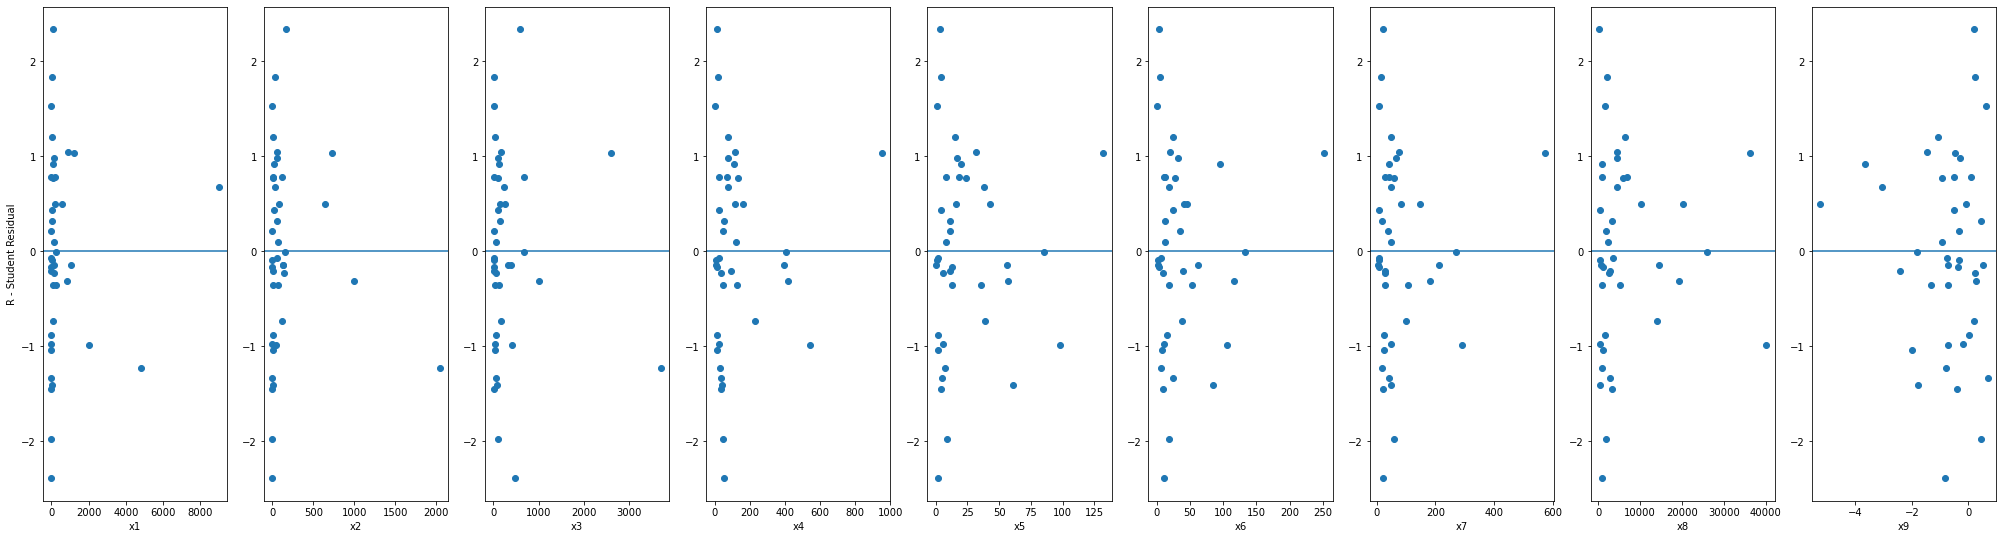

In [652]:
plt.subplots(figsize=(35,20))
plt.subplot(2, 9, 1) 
plt.scatter(df2.x1,influence2.resid_studentized_external)  
plt.xlabel('x1')
plt.ylabel('R - Student Residual')
plt.axhline(0)

plt.subplot(2, 9, 2) 
plt.scatter(df2.x2,influence2.resid_studentized_external)
plt.xlabel('x2')
plt.axhline(0)

plt.subplot(2, 9, 3) #
plt.scatter(df2.x3,influence2.resid_studentized_external)
plt.xlabel('x3')
plt.axhline(0)

plt.subplot(2, 9, 4) 
plt.scatter(df2.x4,influence2.resid_studentized_external)
plt.xlabel('x4')
plt.axhline(0)

plt.subplot(2, 9, 5) 
plt.scatter(df2.x5,influence2.resid_studentized_external)
plt.xlabel('x5')
plt.axhline(0)

plt.subplot(2, 9, 6) 
plt.scatter(df2.x6,influence2.resid_studentized_external)
plt.xlabel('x6')
plt.axhline(0)

plt.subplot(2, 9, 7) #
plt.scatter(df2.x7,influence2.resid_studentized_external)
plt.xlabel('x7')
plt.axhline(0)

plt.subplot(2, 9, 8) 
plt.scatter(df2.x8,influence2.resid_studentized_external)
plt.xlabel('x8')
plt.axhline(0)

plt.subplot(2, 9, 9) 
plt.scatter(df2.x9,influence2.resid_studentized_external)
plt.xlabel('x9')
plt.axhline(0)

plt.show()

From the residuals vs. fitted values plot we can see that the data is more equally spread after transforming the response and predictor x9.

**(b) Afterwards, fit and present the new prediction equation, evaluate its residuals, identify any highly
influential points, and delete any outliers using the class criteria. Re-fit and present the final
prediction equation obtained after deleting the chosen observations as well as its measures of the
goodness of the fit.**

In [653]:
df2_regression.predict()

array([ 0.56358068,  2.15749833, -0.35968684,  0.20591746, -0.65351466,
       -0.69544787,  0.75761381,  1.44000695,  0.54717078, -0.63522893,
       -0.41056316,  0.04254719, -0.48009328, -0.38724649,  2.15859217,
       -0.40491215, -0.54472527, -0.75627514, -0.65606522, -0.56715596,
       -0.50750239, -0.77990196, -0.85149862, -0.76115944, -0.64187749,
       -0.02407581, -0.69819315,  1.47994619, -0.22808859, -0.54632893,
       -0.12028485, -0.23350096,  0.56923794,  0.17965424,  1.56031108,
        0.03511371, -0.51935625, -0.2095388 , -0.55013256,  1.52516424])

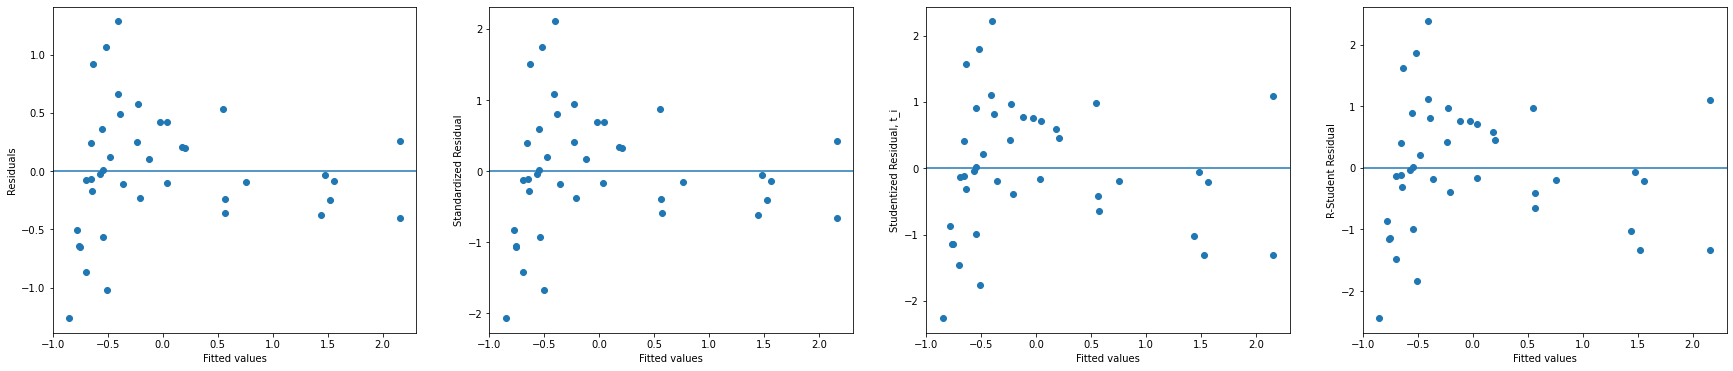

In [654]:
influence2 = df2_regression.get_influence()
f, ax = plt.subplots(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.scatter(df2_regression.fittedvalues,df2_regression.resid)
plt.axhline(0)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Standardized Residuals
standard_residual = influence2.resid/np.sqrt(df2_regression.mse_resid)
plt.subplot(1, 4, 2) 
plt.scatter(df2_regression.fittedvalues,standard_residual)
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residual')
# plt.title("")
plt.axhline(0)

# Studentized Residuals
plt.subplot(1, 4, 3) 
plt.scatter(df2_regression.fittedvalues,influence2.resid_studentized)
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residual, t_i')
# plt.title("")
plt.axhline(0)

# R-Studentized Residuals external
plt.subplot(1, 4, 4) 
plt.scatter(df2_regression.fittedvalues,influence2.resid_studentized_external)
plt.xlabel('Fitted values')
plt.ylabel('R-Student Residual')
#plt.title("")
plt.axhline(0)

plt.show()

The data with the transformed variables shows a more spread out variance. We do see some outliers that need to be taken care of.

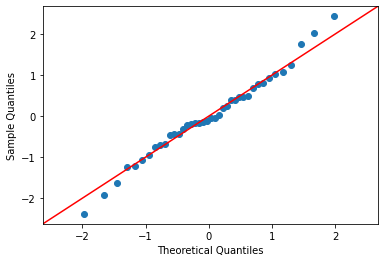

<Figure size 576x432 with 0 Axes>

In [655]:
# Q-Q plot: helps determine if the residuals follow a normal distribution. Data should roughly follow a 45 degree angle.
residuals_tr = df2_regression.resid
fig = sm.qqplot(residuals_tr, fit = True, line= '45')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.show()

The residuals of our model also seem to violate normality at the tails, but this could be due to outliers that are yet needed to be removed. 

#### Indentifying Outliers/Influential Points and Removing them:

-Bonferroni's cutoff previously detected observation **1** as an outlier, and we know we have influential points and leverage points in the data based on the measures of influence and the residuals plots.

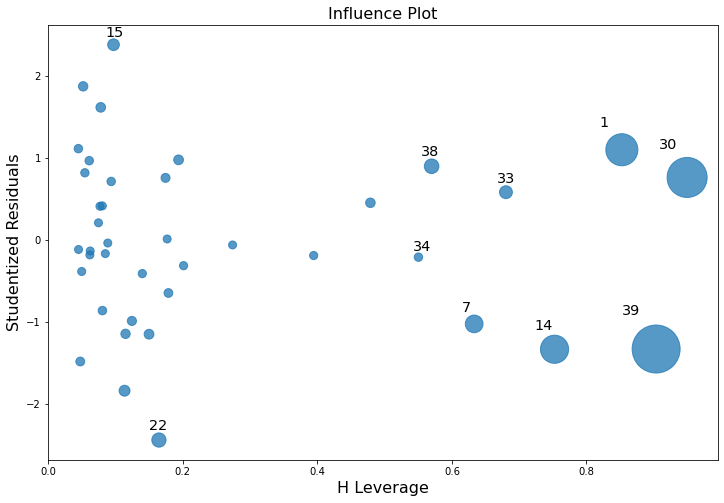

In [657]:
Xnew = df2_regression.model.wexog # get the design matrix
lm_new = sm.OLS(df2['y'], sm.add_constant(Xnew)).fit()

## Plot the leverage vs residuals graph
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm_new, alpha  = 0.05, ax = ax, criterion="cooks")

In [600]:
# DFBETAS
dfbetas = pd.DataFrame(influence2.dfbetas)
dfbetas.columns = ['dfbeta-x1','dfbeta-x2', 'dfbeta-x3','dfbeta-x4', 'dfbeta-x5', 'dfbeta-x6','dfbeta-x7','dfbeta-x8','dfbeta-x9','dfbeta-y']
cutoff = 2/np.sqrt(df.shape[0])
dfbetas[dfbetas.apply(lambda x: (abs(x['dfbeta-x1']) > cutoff) |  \
    (abs(x['dfbeta-x2']) > cutoff) | (abs(x['dfbeta-x3']) > cutoff) | (abs(x['dfbeta-x4']) > cutoff) | (abs(x['dfbeta-x5']) > cutoff) | \
                      (abs(x['dfbeta-x6']) > cutoff) | (abs(x['dfbeta-x7']) > cutoff) | (abs(x['dfbeta-x8']) > cutoff) | (abs(x['dfbeta-x9']) > cutoff) | (abs(x['dfbeta-y']) > cutoff), axis = 1)]

,dfbeta-x1,dfbeta-x2,dfbeta-x3,dfbeta-x4,dfbeta-x5,dfbeta-x6,dfbeta-x7,dfbeta-x8,dfbeta-x9,dfbeta-y
1,-0.408454,0.165265,-0.509080,0.532467,0.075424,-0.427528,0.296291,0.572668,-0.518554,0.220904
3,0.016643,0.041335,0.395638,-0.377894,-0.166952,-0.113098,0.049506,0.215550,0.048078,-0.015239
7,0.194189,-0.100689,0.317349,-0.245790,-0.109428,-0.101083,0.019059,0.447993,-0.759086,-0.159333
8,0.247322,-0.184767,0.151932,-0.120848,0.104504,0.320219,-0.406304,0.090093,-0.327419,-0.204437
9,-0.279999,0.103004,-0.128686,0.077036,-0.098597,-0.013612,0.076925,-0.009444,0.097623,0.439713
14,0.339075,0.693966,-0.195218,0.000338,0.547750,-1.848998,-0.122801,0.357606,0.782039,-0.275136
15,-0.095275,-0.115426,-0.355201,0.452822,-0.144092,0.060166,-0.099569,0.070996,-0.008095,0.306755
17,-0.384376,0.073430,-0.068654,0.068152,0.040408,0.148355,0.076926,-0.169148,0.024622,0.331818
20,0.291238,-0.147849,0.016958,0.068083,0.365117,0.058343,-0.021752,-0.436412,0.117575,-0.456639
22,-0.550551,0.173017,0.722019,-0.747326,-0.492763,0.292938,0.006846,0.447863,-0.111053,0.319592


In [601]:
# DFFITS
cutoff = 2*np.sqrt(9/df.shape[0])
dffits = pd.DataFrame({'dffits':influence2.dffits[0]})
dffits[abs(dffits.values) > cutoff]

,dffits
1,2.497535
7,-1.231723
14,-2.478198
22,-1.092902
30,2.941484
38,0.982903
39,-3.856497


In [602]:
#COVRATIO 
Covratio = pd.DataFrame({'covratio': influence2.cov_ratio})
Covratio[abs(Covratio.values - 1) > 3*(df.shape[1]+1)/df.shape[0]]

,covratio
1,6.726040
3,2.458653
6,2.244146
7,2.550772
14,2.925234
27,1.928948
30,24.477858
33,2.436121
34,3.123791
38,2.256824


In [603]:
Covratio[Covratio.values < 1]

,covratio
9,0.734816
10,0.916021
15,0.279307
20,0.455066
22,0.279831
23,0.954732
26,0.729229
36,0.499926


Based on the measures of influence, I will convert observations 1,3,7,14,15,30,34,36 and 39 into the mean or median values of their respective columns since removing them would be too many data points to be removed considering we only have 40 observations. <br>If I remove this points my results will be more biased. 

In [668]:
# Decided to drop observation 39  and 15 as they were really different from the rest of the points and I assume it is an influential point. 
df3 = df2.copy()
df3.drop([1,15],inplace=True) 


In [669]:
df3_scale = (df3 - df3.mean())/df3.std()

df3_regression = ols('y~x1+x2+x3+x4+x5+x6+x7+x8+x9', df3_scale).fit()
print(df3_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     8.421
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           5.80e-06
Time:                        20:59:15   Log-Likelihood:                -28.520
No. Observations:                  38   AIC:                             77.04
Df Residuals:                      28   BIC:                             93.42
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.914e-16      0.097  -3.01e-15      1.0

<div class = 'alert alert-warning'>
I tried converting high leverage points and other points that might be influential into averages and median values of their respecitve columns but the regression results were worse than if I did not touch them so I decided to leave them as they are. Because there are several high leverage points that could be influential, if I change all these values for the respective observation, our fit changes a lot. Since the data shifts, we get new high leverage points and the cycle of removing/changing and identifying leverage points doesn't end.
      <br>  <br> I decided to only remove observations 1 and 15 and got a more decent regression result. (not that okay with this because now I only have 38 observations to give me all the information I need from this data)
    </div>

In [670]:
df3_pred = df3_regression.predict()

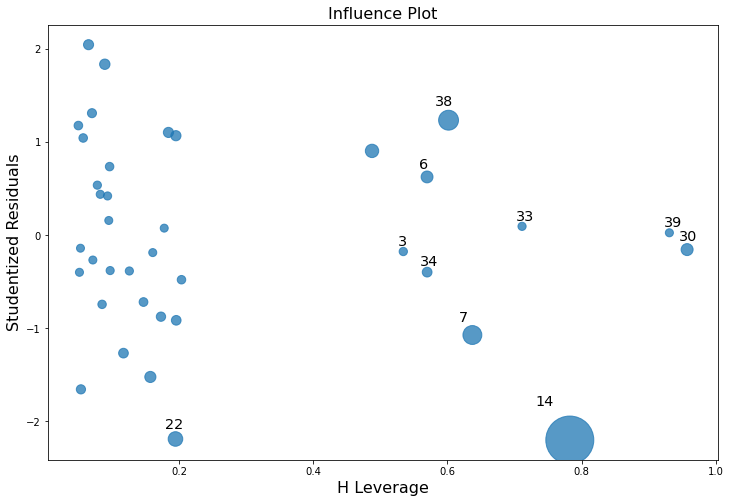

In [671]:
a = df3_regression.model.wexog # get the design matrix
b = sm.OLS(df3['y'], sm.add_constant(a)).fit()

## Plot the leverage vs residuals graph
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(b, alpha  = 0.05, ax = ax, criterion="cooks")

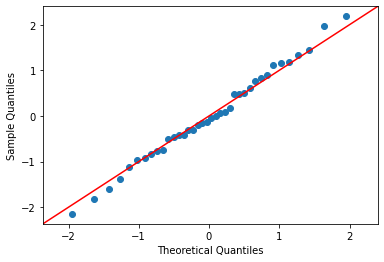

<Figure size 576x432 with 0 Axes>

In [672]:
# Q-Q plot: helps determine if the residuals follow a normal distribution. Data should roughly follow a 45 degree angle.
residuals3 = df3_regression.resid
fig = sm.qqplot(residuals3, fit = True, line= '45')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.show()

Normality assumption is good enough.

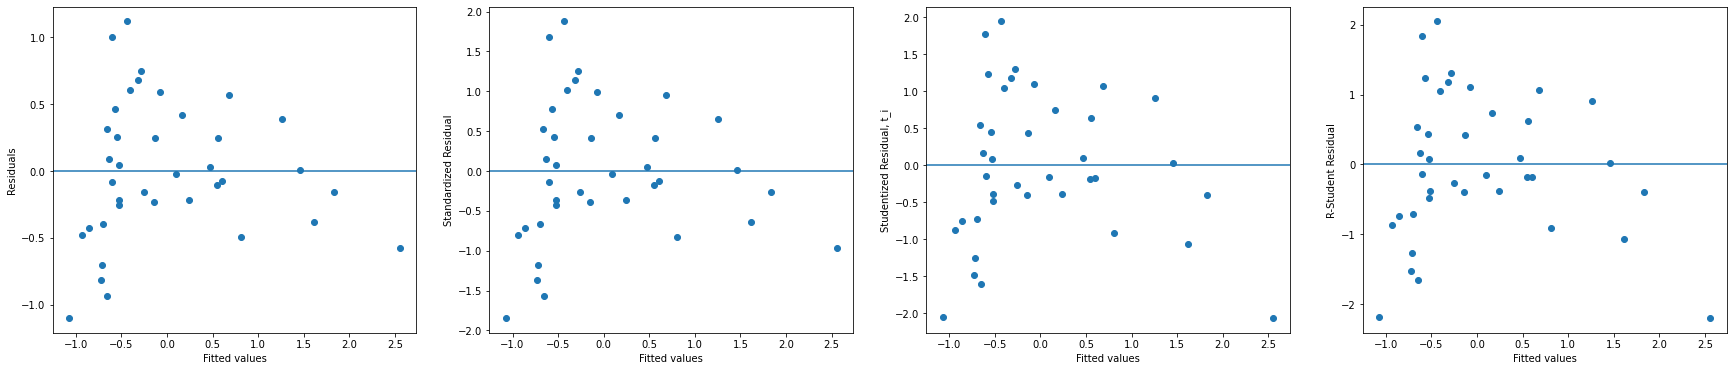

In [673]:
influence3 = df3_regression.get_influence()
f, ax = plt.subplots(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.scatter(df3_regression.fittedvalues,df3_regression.resid)
plt.axhline(0)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Standardized Residuals
standard_residual = influence3.resid/np.sqrt(df3_regression.mse_resid)
plt.subplot(1, 4, 2) 
plt.scatter(df3_regression.fittedvalues,standard_residual)
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residual')
# plt.title("")
plt.axhline(0)

# Studentized Residuals
plt.subplot(1, 4, 3) 
plt.scatter(df3_regression.fittedvalues,influence3.resid_studentized)
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residual, t_i')
# plt.title("")
plt.axhline(0)

# R-Studentized Residuals external
plt.subplot(1, 4, 4) 
plt.scatter(df3_regression.fittedvalues,influence3.resid_studentized_external)
plt.xlabel('Fitted values')
plt.ylabel('R-Student Residual')
#plt.title("")
plt.axhline(0)

plt.show()

After transforming the the response variable and y and x9 as well as removing 2 outliers, we see that our data is way more spread than before, still we have a several outliers that should be dealt with and there seems to be a pattern to the distribution of the residuals vs. fitted values.

### Multicollinearity

Multicollinearity occurs when there is a high correlation between the independent variables in the regression analysis which impacts the overall interpretation of the results. It reduces the power of coefficients and weakens the statistical measure to trust the p-values to identify the significant independent variables. Hence, we would not be able to examine the individual explanation of the independent variables on the dependent variable.
<br>
<br>
To fix multicollinearity we can either combine collinear variables or drop them from our model where the same information is being captured by other variables. 

##### Principal Component Analysis (PCA)

In [675]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [676]:
pca = PCA()

Text(0.5, 1.0, 'y: Solid Waste')

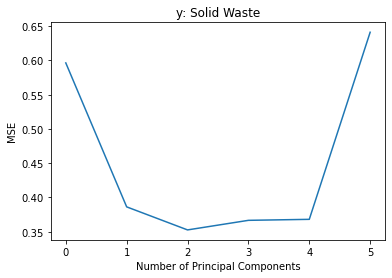

In [677]:
#define predictor and response variables
X = df3[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9"]]
y = df3[["y"]]

#scale predictor variables
df3_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(df3_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               df3_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('y: Solid Waste')

<div class = 'alert alert-warning'>
From the PCA plot we can see that the test MSE decreases by adding in two principal components, yet it begins to increase as we add more than two principal components. </div>

Percentage of variance in the response variable explained by adding in each principal component to the model:

In [678]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([51.46, 75.17, 87.79, 94.3 , 97.22, 98.33, 99.08, 99.6 , 99.99])

Final Model to Make Predictions:

In [679]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

0.534674503051293

<div class = 'alert alert-warning'>
This is the point estimate from the model after training and testing the data.  0.5346 is the average deviation between the predicted value for Solid Waste and the observed value for Solid Waste for the observations in the testing set. </div>

Based on the percentage of variance explained I decided to use 4 regressors: x1, x2, and x5

In [722]:
reduced_model = ols('y~x1+x2+x5', data = df3_scale).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     17.25
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           5.56e-07
Time:                        21:42:55   Log-Likelihood:                -35.836
No. Observations:                  38   AIC:                             79.67
Df Residuals:                      34   BIC:                             86.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.914e-16      0.107  -2.73e-15      1.0

---

### **NEW PREDICTION EQUATION:**
<div class = 'alert alert-success'>
$y^*$ = -2.914e-16  - 0.1638$Xindus$ - 0.5882$Xmetal$  - 0.0005$Xretail$ +  1.2108$Xrest$ 

**(c) Compare the final prediction equation obtained in part 5(b) to the one you obtained in Problem
part 1(b). State your results. State which equation you prefer and the rationale for your decision.**


<div class = 'alert alert-success'>
Comparing the prediction equation obtained from 1(b) to the one obtained in 5(b), the better equation is the one for 5(b) because I have dealt with multicollinearity, transformations that were needed to meet the assumptions of a Multiple Linear Regression model and have removed any outlier/influential point. 
    
**I have to admit that the transformations I made and the predictors removed to try and resolve multicollinearity might not have been the best since the information criterias for the full, untransformed model is lower than the reduced model.** 
    
The lower information criterias score indicate that the full model is better. The AIC could be over-fit since it is a more flexible model when compared to BIC, but still, both criterions showed to be much lower for the full model compared to the reduced model. R-squared and log likelihood are higher for the full model, showing a better fit as well.
    
Knowing that the data had outliers, influential points and multicollinearity problems, I conclude that the reduced model is better since the results of the full model are deteriorate by hiding effects, increasing variances, affecting the slope of our model, and overall just decrementing the performance of our model. These problems are not evident, so we need to be careful to not just fit a regression model and choose the one with the highest R-squared and lowest MSE.
</div>


![UTSA Logo](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.M5HebCzrq8VtGJqCH47pSAHaDU%26pid%3DApi&f=1)

---


<div class = 'alert alert-info'>
THANK YOU!
</div>